## Harrasment Identification from Online Comments via Machine Learning and Deep Learning Models

#### Dataset: Bangla Online Comments Dataset
#####  Published: 29 January 2021

The total amount of collected comments is 44001. The dataset aims to differentiate whether a comment is a bully expression or not with the help of Natural Language Processing and to what extent it is improper if it is an inappropriate comment. The comments are labeled with different categories of harassment with the help of experts and consensus.

URL: https://data.mendeley.com/datasets/9xjx8twk8p/1

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df_dir= '/content/drive/MyDrive/Dataset NLP/bangla_online_comments_dataset.csv'

Mounted at /content/drive


In [ ]:
df=pd.read_csv(df_dir)

In [ ]:
df

,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll
...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully


## Sampling

Using judgemental or weighted sampling so that label: 'threat' is sufficiently available.

In [ ]:
df['weights'] = df['label'].map({'threat': 60, 'religious': 10, 'sexual': 10, 'troll': 10, 'not bully': 10})
df=df.sample(n=25000,random_state = 1,weights='weights')

In [ ]:
df

,comment,Category,Gender,comment react number,label
0,ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...,Actor,Female,1.0,sexual
1,ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...,Singer,Male,2.0,not bully
2,"অরে বাবা, এই টা কোন পাগল????",Actor,Female,2.0,not bully
3,ক্যাপ্টেন অফ বাংলাদেশ,Sports,Male,0.0,not bully
4,পটকা মাছ,Politician,Male,0.0,troll
...,...,...,...,...,...
43996,"হিরো আলম,, এগিয়ে যাও",Social,Male,0.0,not bully
43997,হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...,Social,Male,1.0,not bully
43998,হিরো ভাই তুমি এগিয়ে য়াও,Social,Male,0.0,not bully
43999,হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি,Actor,Female,1.0,not bully


In [ ]:
df.isnull().sum()

comment                 0
Category                0
Gender                  0
comment react number    3
label                   0
dtype: int64

In [ ]:
if(df.duplicated().sum()>0):
  print("Duplicates Found.Removing Duplicate")
  df=df.drop_duplicates(keep = 'first')

Duplicates Found.Removing Duplicate


In [ ]:
df['label'].value_counts()

not bully    15321
troll        10439
sexual        8883
religious     7529
threat        1689
Name: label, dtype: int64

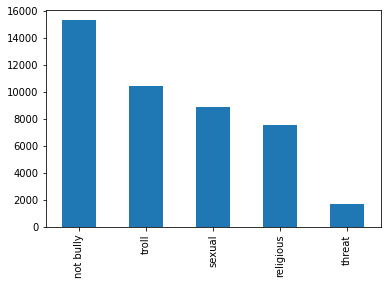

In [ ]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')

Removing Stop Words

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('bengali')
df['comment'] = df['comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Stemming

In [ ]:
from nltk.stem import PorterStemmer
#Stemming
ps = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)


## Keras Embedding ANN CNN LSTM




ANN With One Hot Embedding

In [ ]:
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
model1=Sequential()
model1.add(Embedding(voc_size,dim,input_length=sent_length))
model1.add(Flatten())
model1.add(Dense(2000))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(1000))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(500))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(500))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

#final layer
model1.add(Dense(5))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [ ]:
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', mode='max', save_best_only=True)

history1=model1.fit(xtrain,y_train_new,batch_size=64,epochs=5,validation_data=(xtest,y_test_new),callbacks=model_checkpoint_callback)

Epoch 1/5
550/550 [==============================] - 177s 319ms/step - loss: 1.0162 - accuracy: 0.5961 - val_loss: 0.7985 - val_accuracy: 0.7171
Epoch 2/5
550/550 [==============================] - 165s 300ms/step - loss: 0.5758 - accuracy: 0.8006 - val_loss: 0.8142 - val_accuracy: 0.7150
Epoch 3/5
550/550 [==============================] - 169s 307ms/step - loss: 0.2961 - accuracy: 0.9047 - val_loss: 1.0281 - val_accuracy: 0.7061
Epoch 4/5
550/550 [==============================] - 161s 293ms/step - loss: 0.1669 - accuracy: 0.9492 - val_loss: 1.3152 - val_accuracy: 0.6911
Epoch 5/5
550/550 [==============================] - 162s 295ms/step - loss: 0.1078 - accuracy: 0.9664 - val_loss: 1.4751 - val_accuracy: 0.6981


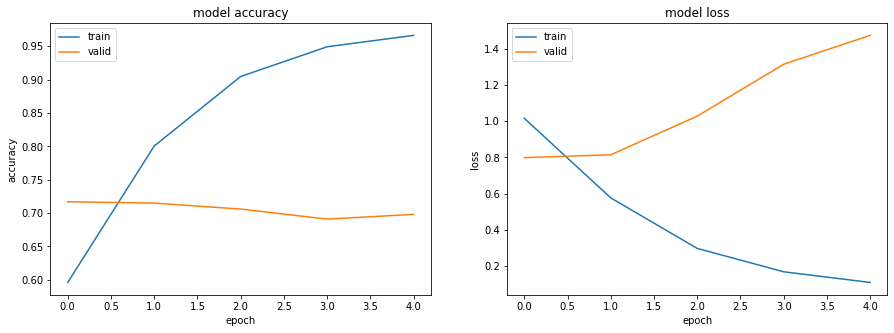

In [ ]:
results(history1)

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,xtest,y_test_new)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.6981  Precision= 0.7022  Recall= 0.6981  F1 Score=  0.6972


1D CNN WTH Embedding

In [ ]:
model1=Sequential()
model1.add(Embedding(voc_size,dim,input_length=sent_length))
model1.add(Flatten())
model1.add(Dense(2000))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(1000))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(500))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

model1.add(Dense(500))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))

#final layer
model1.add(Dense(5))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')


In [ ]:
checkpoint_filepath = 'weights.{epoch:02d}-{val_loss:.2f}.h5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_accuracy', mode='max', save_best_only=True)

history1=model1.fit(xtrain,y_train_new,batch_size=64,epochs=5,validation_data=(xtest,y_test_new),callbacks=model_checkpoint_callback)

Epoch 1/5
550/550 [==============================] - 177s 319ms/step - loss: 1.0162 - accuracy: 0.5961 - val_loss: 0.7985 - val_accuracy: 0.7171
Epoch 2/5
550/550 [==============================] - 165s 300ms/step - loss: 0.5758 - accuracy: 0.8006 - val_loss: 0.8142 - val_accuracy: 0.7150
Epoch 3/5
550/550 [==============================] - 169s 307ms/step - loss: 0.2961 - accuracy: 0.9047 - val_loss: 1.0281 - val_accuracy: 0.7061
Epoch 4/5
550/550 [==============================] - 161s 293ms/step - loss: 0.1669 - accuracy: 0.9492 - val_loss: 1.3152 - val_accuracy: 0.6911
Epoch 5/5
550/550 [==============================] - 162s 295ms/step - loss: 0.1078 - accuracy: 0.9664 - val_loss: 1.4751 - val_accuracy: 0.6981


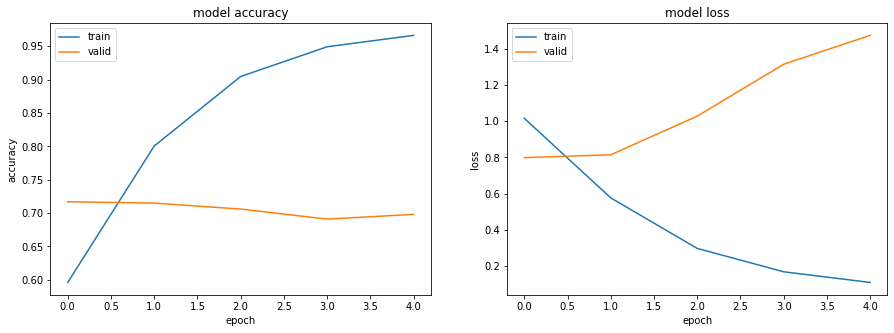

In [ ]:
results(history1)

In [ ]:
ac,pr,re,f1 = getClassificationResult(model1,xtest,y_test_new)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.6981  Precision= 0.7022  Recall= 0.6981  F1 Score=  0.6972


In [ ]:
model2=Sequential()
model2.add(Embedding(voc_size,dim,input_length=sent_length))
model2.add(Dropout(0.1))
model2.add(Conv1D(filters=250,
                 kernel_size=1,
                 padding='same',
                 activation='relu',
                 strides=1))
model2.add(GlobalMaxPooling1D())
model2.add(Dense(250))
model2.add(Activation('relu'))
model2.add(Dense(5, activation='softmax'))




model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])  

In [ ]:
history2 = model2.fit(xtrain, y_train_new,
                    batch_size=64,
                    epochs=5,
                    validation_data=(xtest, y_test_new))

Epoch 1/5
550/550 [==============================] - 33s 58ms/step - loss: 0.8249 - accuracy: 0.6920 - val_loss: 0.6824 - val_accuracy: 0.7557
Epoch 2/5
550/550 [==============================] - 33s 59ms/step - loss: 0.5543 - accuracy: 0.8052 - val_loss: 0.6789 - val_accuracy: 0.7580
Epoch 3/5
550/550 [==============================] - 31s 57ms/step - loss: 0.4321 - accuracy: 0.8504 - val_loss: 0.7686 - val_accuracy: 0.7478
Epoch 4/5
550/550 [==============================] - 34s 61ms/step - loss: 0.3279 - accuracy: 0.8866 - val_loss: 0.8415 - val_accuracy: 0.7380
Epoch 5/5
550/550 [==============================] - 33s 59ms/step - loss: 0.2392 - accuracy: 0.9198 - val_loss: 0.9868 - val_accuracy: 0.7292


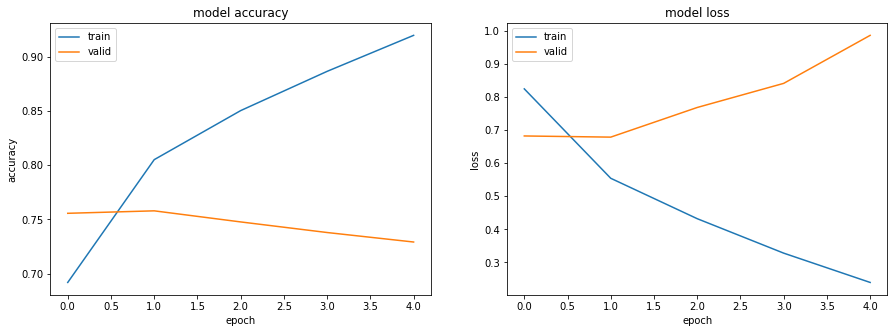

In [ ]:
results(history2)

In [ ]:
ac,pr,re,f1 = getClassificationResult(model2,xtest,y_test_new)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.7292  Precision= 0.7335  Recall= 0.7292  F1 Score=  0.7302


In [ ]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

In [ ]:
model3 = Sequential()
model3.add(Embedding(voc_size,dim,input_length=sent_length))
model3.add(Dropout(0.3))
model3.add(LSTM(200))
model3.add(Dropout(0.3))
model3.add(Dense(5,activation='softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model3.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 80)           800000    
                                                                 
 dropout_7 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm (LSTM)                 (None, 200)               224800    
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                                 
 dense_11 (Dense)            (None, 5)                 1005      
                                                                 
Total params: 1,025,805
Trainable params: 1,025,805
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history3=model3.fit(xtrain, y_train_new, epochs = 5, batch_size=16,validation_data=(xtest, y_test_new), verbose = 'auto')

Epoch 1/5
2200/2200 [==============================] - 491s 221ms/step - loss: 0.8649 - accuracy: 0.6764 - val_loss: 0.6900 - val_accuracy: 0.7538
Epoch 2/5
2200/2200 [==============================] - 470s 213ms/step - loss: 0.5827 - accuracy: 0.7985 - val_loss: 0.6956 - val_accuracy: 0.7604
Epoch 3/5
2200/2200 [==============================] - 472s 214ms/step - loss: 0.4742 - accuracy: 0.8370 - val_loss: 0.7051 - val_accuracy: 0.7600
Epoch 4/5
2200/2200 [==============================] - 470s 213ms/step - loss: 0.3878 - accuracy: 0.8685 - val_loss: 0.7713 - val_accuracy: 0.7496
Epoch 5/5
2200/2200 [==============================] - 493s 224ms/step - loss: 0.3153 - accuracy: 0.8938 - val_loss: 0.7963 - val_accuracy: 0.7509


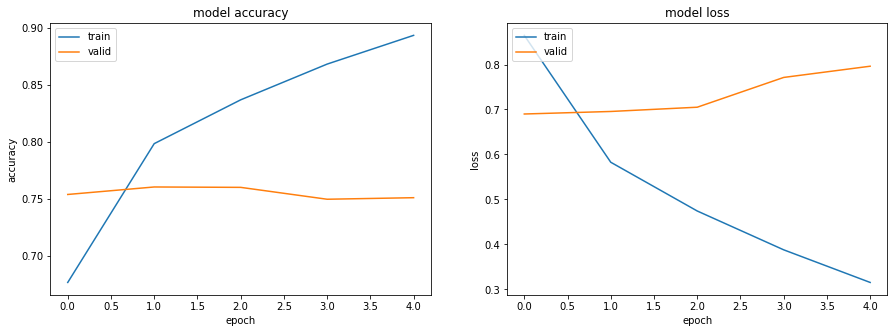

In [ ]:
results(history3)

In [ ]:
ac,pr,re,f1 = getClassificationResult(model3,xtest,y_test_new)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)
result.append(getClassificationResult(model3,xtest,y_test_new))

Accuracy= 0.7509  Precision= 0.7505  Recall= 0.7509  F1 Score=  0.7497


## BERT

Model

In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(5, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [ ]:
history4=classifier_model.fit(xtrain,y_train_new,epochs=50,batch_size=128,validation_data=(xtest,y_test_new),callbacks=model_checkpoint_callback)

Epoch 1/50
275/275 [==============================] - 362s 1s/step - loss: 1.6394 - accuracy: 0.2489 - val_loss: 1.4619 - val_accuracy: 0.3362
Epoch 2/50
275/275 [==============================] - 353s 1s/step - loss: 1.4644 - accuracy: 0.3439 - val_loss: 1.3562 - val_accuracy: 0.4127
Epoch 3/50
275/275 [==============================] - 356s 1s/step - loss: 1.3666 - accuracy: 0.4015 - val_loss: 1.2280 - val_accuracy: 0.4882
Epoch 4/50
275/275 [==============================] - 354s 1s/step - loss: 1.2262 - accuracy: 0.4960 - val_loss: 1.0679 - val_accuracy: 0.5677
Epoch 5/50
275/275 [==============================] - 356s 1s/step - loss: 1.1001 - accuracy: 0.5568 - val_loss: 1.0106 - val_accuracy: 0.5960
Epoch 6/50
275/275 [==============================] - 355s 1s/step - loss: 1.0419 - accuracy: 0.5792 - val_loss: 0.9712 - val_accuracy: 0.6137
Epoch 7/50
275/275 [==============================] - 354s 1s/step - loss: 0.9898 - accuracy: 0.6028 - val_loss: 0.9141 - val_accuracy: 0.6392

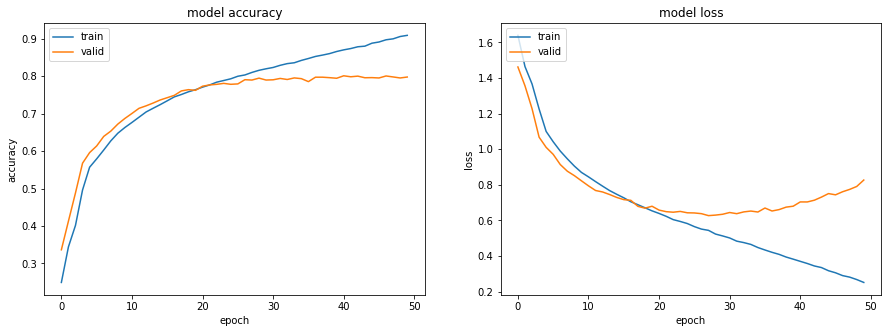

In [ ]:
from matplotlib import pyplot as plt
def results(history):
    # Accuracy
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy']); plt.plot(history.history['val_accuracy']);
    plt.title('model accuracy'); plt.ylabel('accuracy');
    plt.xlabel('epoch'); plt.legend(['train', 'valid'], loc='upper left');

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss']); plt.plot(history.history['val_loss']);
    plt.title('model loss'); plt.ylabel('loss');
    plt.xlabel('epoch'); plt.legend(['train', 'valid'], loc='upper left');
    plt.show()
results(history4)

Model Best Result

In [ ]:
from tensorflow import keras
model_dir= '/content/drive/MyDrive/Dataset NLP/'

best_model=keras.models.load_model(model_dir+"weights.41-0.70.h5",custom_objects={'KerasLayer':hub.KerasLayer},compile=False)


In [ ]:
ac,pr,re,f1 = getClassificationResult(best_model,xtest,y_test_new)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8013  Precision= 0.8002  Recall= 0.8013  F1 Score=  0.7999


Result Comparison

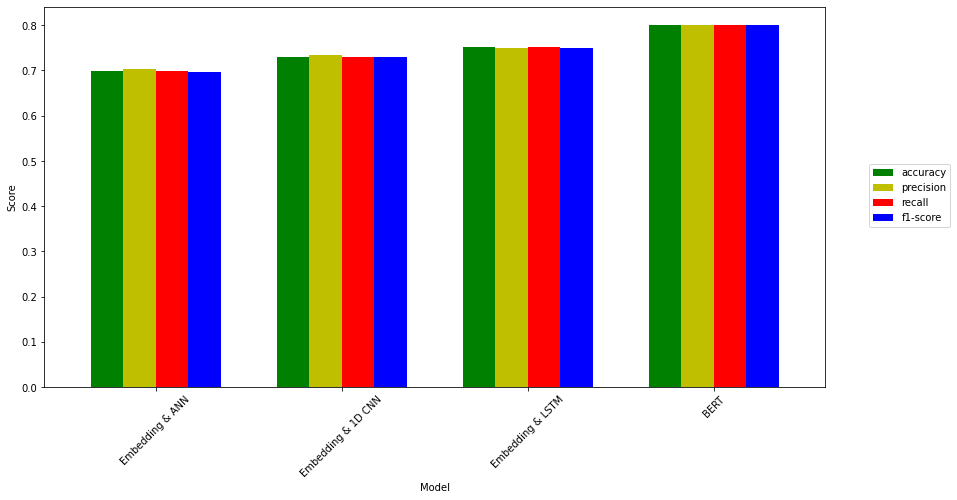

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data={'accuracy':[result[0][0],result[1][0],result[2][0],result[3][0]],'precision':[result[0][1],result[1][1],result[2][1],result[3][1]],'recall':[result[0][2],result[1][2],result[2][2],result[3][2]],'f1-score':[result[0][3],result[1][3],result[2][3],result[3][3]],'Model':['Embedding & ANN','Embedding & 1D CNN','Embedding & LSTM','BERT']}
df = pd.DataFrame(data)

ax = df[["Model","accuracy", "precision", "recall", "f1-score"]].plot(x='Model', 
                                                      kind='bar', 
                                                      color=["g","y","r","b"],
                                                      rot=45,figsize=(14,7),width=.70)
ax.set_ylabel('Score')
ax.legend(["accuracy", "precision","recall", "f1-score"],bbox_to_anchor = (1.05, 0.6));


#### Result: 


*   BERT model performs better result than other (80% Accuracy)



